## Data Analysis Notebook

In this notebook, we use matplotlib, geopandas, and seaborn to conduct fundamental analysis and visualize data and metadata retrieved from the Data Retrieval Notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import geopandas

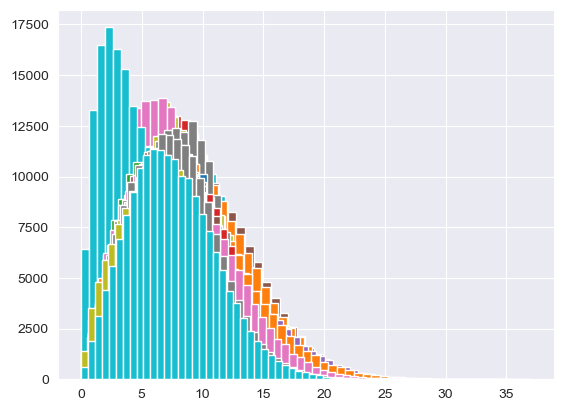

In [89]:
# Plot the distribution of wind speed for all 100 points at 60 min resolution
# Noticeably, this distribution is very consistently skewed right regardless of the point
for filename in os.listdir(r"Data\NOW-23 Great Lakes [2000-2020] 60min"):
    data = pd.read_csv("C:Data/NOW-23 Great Lakes [2000-2020] 60min/" + filename, index_col=0)
    data["wind speed at 80m (m/s)"].hist(bins=50)

C:\Users\shell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


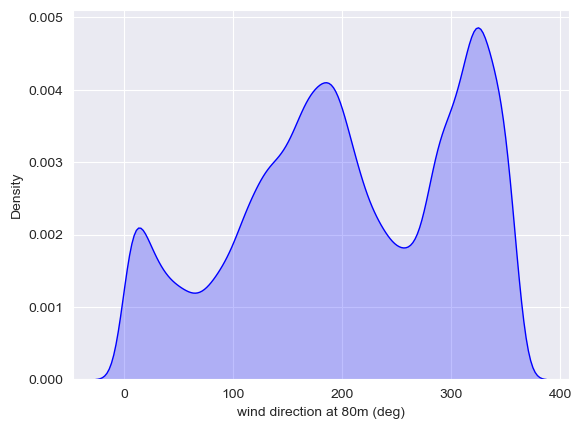

In [2]:
# Let's look at the wind direction data for a single point at 5 min resolution
data = pd.read_csv("Data/NOW-23 Great Lakes [2000-2020] 60min/15713.csv", index_col=0)

# We can draw a nice line representing the histogram using Kernel Density Estimation
sns.kdeplot(data["wind direction at 80m (deg)"], color="blue", fill=True)
plt.show()

C:\Users\shell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


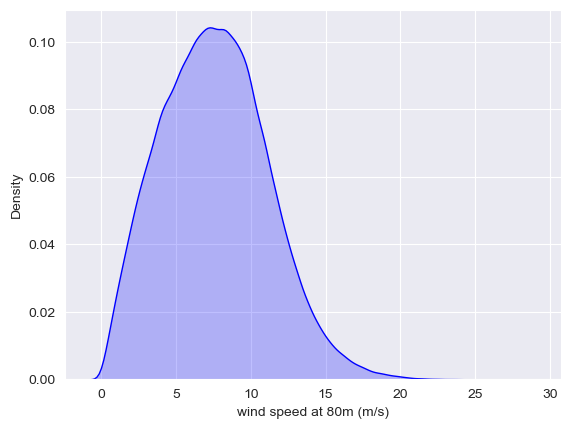

In [3]:
# We can do the same for the wind speed
sns.kdeplot(data["wind speed at 80m (m/s)"], color="blue", fill=True)
plt.show()

<Axes: >

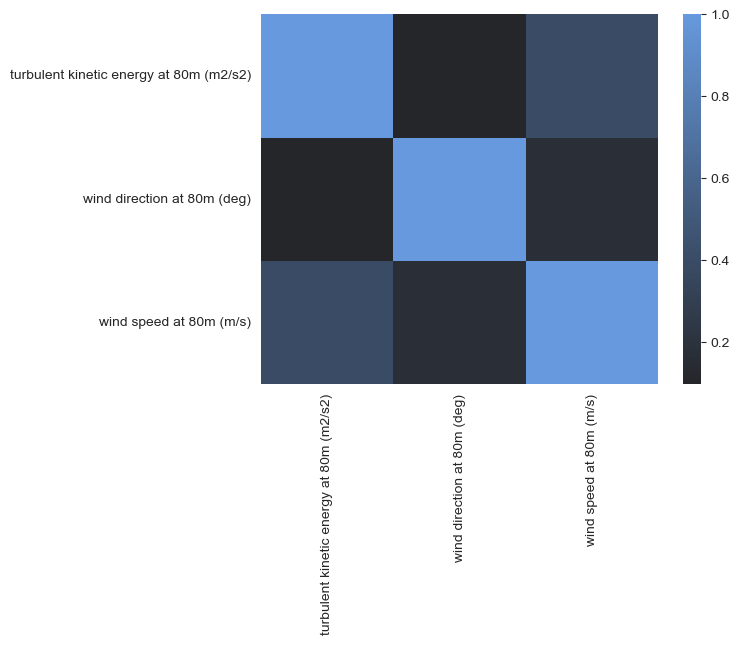

In [91]:
# We can make a correlation matrix to visualize the correlation between the variables
corr_matrix = data.iloc[:, 6:9].corr()
blue_map = sns.dark_palette("#69d", reverse=False, as_cmap=True)
sns.heatmap(corr_matrix, cmap=blue_map, annot=False)

In [3]:
metadata = geopandas.read_file(r"Data\NOW-23 Great Lakes [2000-2020] metadata.csv").iloc[:, 1:]

gdf = geopandas.GeoDataFrame(
    metadata, geometry=geopandas.points_from_xy(metadata['Longitude'], metadata['Latitude']), crs="EPSG:4326"
)

gdf.explore(marker_type="circle_marker", marker_kwds=dict(radius=7))